# Project: Comparing Life Expectancies in G7 Countries Based On Health Economics

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

Several datasets have been chosen to be joined together to compare life expectancy in G7 countries, including the United States, Japan, Germany, United Kindgom, France, Italy, and Canada. The G7 group of countries is "an informal political grouping of the world's advanced economies" (Canada, 2023). Life expectancy will be compared while considering the difference in aspects of health economics between countries.

All datasets were obtained from Gapminder and include life expectancy, percent of government health spending, government health spending per person in dollars, and percent of private health spending. The life expectancy dataset is based on the amount of years a newborn is expected to live if the mortality rate remains constant throughout life (Gapminder, 2023). The percent of governent health spending dataset is based on the percent of total government expenditure that was spent on health. The government health spending per person is based on the average government health expenditure per person, in US dollars. Finally, the percent of private health spending dataset is based on the percent of the total health expenditure that has been paid by commercial insurance companies or by patient out of pocket spending (World Health Organization, 2023).

The questions that this report aims to answer are if higher health expenditures correlate with an increased life expectancy overall as well as if there are sigificant differences in health expenditures between G7 countries, considering the countries included are all considered to have advanced economies. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

After reading in the datasets, they will each be reduced to the countries and years of interest in this report. The countries being analyzed are the G7 countries, which are the US, UK, Canada, Japan, France, Germany, and Italy. The year spans vary across the datasets, so after determining general properties, the years of interest will be determined.

### General Properties

In [2]:
# Read in life expectancy dataset
life_expect = pd.read_csv('lifeexpectancy.csv')

# Read in percent of gov spending for health dataset
gov_percent = pd.read_csv('government_health_spending_of_total_gov_spending_percent.csv')

# Read in gov spending per person dataset
gov_pp = pd.read_csv('government_health_spending_per_person_us.csv')

# Read in percent of private spending for health dataset
priv_spend = pd.read_csv('private_share_of_total_health_spending_percent.csv')

In [11]:
# Function to print out general properties of a dataframe
def gen_properties(df):
    print('First 5 rows:')
    print(df.head())
    print()
    print('Shape:', df.shape)
    print()
    print('Data Types:')
    print(df.dtypes)
    print()
    print('Amount of duplicates:', sum(df.duplicated()))
    print()
    print('Summary Statistics:')
    print(df.describe())

    return None

In [12]:
# General properties for life_expect
gen_properties(life_expect)

First 5 rows:
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4          UAE  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  ...   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  82.4  82.5  82.6  82.7  82.8  82.9  83.0  83.1  83.2  83.3  

[5 rows x 302 columns]

Shape: (195, 302)

Data Types:
country     object
1800       float64
1801       float64
1802       float64
1803   

The general properties of the life expectancy dataset show that it has 195 rows and 302 columns. The years of data span from 1800 to 2100, showing that some of the data is predicted for the future. The datatype for each column is float. There are no duplicates in the dataframe. The summary statistics only show for years from 1800-1809 and 2091-2100, so it is not very helpful at this stage. 

In [13]:
gen_properties(gov_percent)

First 5 rows:
       country   1995   1996   1997   1998   1999   2000   2001   2002   2003  \
0  Afghanistan    NaN    NaN    NaN    NaN    NaN    NaN    NaN   1.48   1.48   
1       Angola   5.00   2.68   3.57   3.15   1.76   3.26   6.06   3.74   4.83   
2      Albania   5.26   6.34   6.47   6.10   7.18   7.03   7.24   7.32   7.64   
3      Andorra  23.60  23.80  23.20  28.70  20.80  19.10  19.20  20.00  22.00   
4          UAE   8.09   7.13   8.76   8.00   8.01   7.64   7.73   7.98   8.35   

    2004   2005   2006   2007   2008   2009   2010  
0   1.48   1.48   1.48   1.48   1.48   1.58   1.59  
1   4.12   4.38   6.06   5.75   6.40  10.10   7.18  
2   9.23   9.79   9.05   8.46   8.21   8.42   8.42  
3  22.70  22.00  22.80  21.30  21.30  21.30  21.30  
4   8.21   8.70   8.95   8.93   8.85   8.76   8.79  

Shape: (192, 17)

Data Types:
country     object
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float6

The percent of government spending for healthcare dataset includes 192 rows and 17 columns. The years of data span from 1995-2010, which is a much shorter span than the previous dataset. The datatype for the columns is float, so it will not have to be converted to work with the previous data. There are no duplicates within the dataset. The summary statistics show a mean of around 10% to around 11% from 1995-2010, however the average is based on over 100 countries.

In [14]:
gen_properties(gov_pp)

First 5 rows:
       country   1995    1996   1997     1998    1999   2000   2001      2002  \
0  Afghanistan    NaN     NaN    NaN      NaN     NaN    NaN    NaN     0.833   
1       Angola   13.5    8.72   10.5     6.65    6.55   12.5   18.3    14.300   
2      Albania   13.9   17.10   14.2    18.60   28.10   27.2   30.5    32.500   
3      Andorra  897.0  983.00  967.0  1340.00  942.00  862.0  890.0  1020.000   
4          UAE  583.0  580.00  588.0   565.00  559.00  577.0  638.0   578.000   

      2003     2004     2005     2006    2007     2008     2009     2010  
0     1.25     1.61     2.52     2.81     3.5     3.75     3.91     4.39  
1    19.40    19.70    27.10    50.90    68.4   126.00   181.00   102.00  
2    40.60    63.90    71.40    75.50    88.8   109.00   107.00    94.00  
3  1300.00  1520.00  1630.00  1850.00  2100.0  2370.00  2360.00  2170.00  
4   611.00   588.00   608.00   659.00   718.0  1010.00  1310.00  1080.00  

Shape: (192, 17)

Data Types:
country     object

The government spending per person (dollars) dataset includes 192 rows and 17 columns, which is the exact same as the above dataset. The years span from 1995-2010, just as above. The datatype for the columns is also float. There are no duplicates within the dataset. The summary statistics show an average government expenditure of around 308-730 dollars per person from 1995-2010. This average is based on over 100 countries. 

In [15]:
gen_properties(priv_spend)

First 5 rows:
       country  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN  94.4  93.2  92.2   
1       Angola  13.2  23.1  22.1  26.9  25.8  20.8  14.5  21.1  18.9  24.0   
2      Albania  50.0  60.4  60.8  60.5  56.7  63.9  61.8  63.9  64.1  60.3   
3      Andorra  35.6  34.8  33.8  28.0  33.9  35.2  31.3  31.2  31.4  30.8   
4          UAE  21.0  20.8  21.7  32.7  34.0  34.9  21.7  36.9  36.8  40.9   

   2005  2006  2007  2008  2009  2010  
0  88.5  88.2  87.8  88.2  88.4  88.3  
1  25.5  20.7  19.8  15.7  10.1  17.5  
2  59.8  60.6  61.8  60.4  58.8  61.0  
3  30.9  29.6  30.2  30.1  29.9  29.9  
4  41.0  40.6  40.4  34.0  23.1  25.6  

Shape: (192, 17)

Data Types:
country     object
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64

The percent of private spending for healthcare dataset also includes 192 rows and 17 columns, spanning from 1995-2010, just as the previous two datasets. The datatype for the columns is also float. There are no duplicates within the dataset. The summary statistics show an average private expenditure of around 40-42%. 

### Data Cleaning

After exploring the general properties of the above datasets, it can be determined that the life expectancy dataframe must be reduced to fit the year span for the other three dataframes. The common year span between all datasets is 1995-2010, however that is a 15 year span which is too excessive for this report. The years of interest will be a ten year span from 2000-2010, so the columns will be reduced to include country and each year from 2000-2010. The countries included must also be reduced to the countries of interest in this report. The datasets will need to be joined to be able to analyze them properly. The datatypes are uniform across all of the datasets, so no conversions are necessary. The dataframes will need to be transformed to include a column for year with the years as values, instead of the individual years as columns themselves. Columns will also need to be created for each indicator value before the dataframes are joined together.

In [337]:
# Reduces columns to only include 2000-2010
cols_00_10 = ['country', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
life_expect = life_expect[cols_00_10]
gov_percent = gov_percent[cols_00_10]
gov_pp = gov_pp[cols_00_10]
priv_spend = priv_spend[cols_00_10]

# Selects only rows for G7 countries 
query = 'country == "USA" | country == "Japan" | country == "Germany" | country == "UK" | country == "France" | country == "Italy" | country == "Canada"'
life_expect = life_expect.query(query)
gov_percent = gov_percent.query(query)
gov_pp = gov_pp.query(query)
priv_spend = priv_spend.query(query)

In [338]:
# Transforms dataframe to structure of country, year, indicator value for each
life_expect = life_expect.melt(id_vars="country", var_name="year", value_name="life_expectancy")

gov_percent = gov_percent.melt(id_vars="country", var_name="year", value_name="gov_expend_percent")

gov_pp = gov_pp.melt(id_vars="country", var_name="year", value_name="gov_dol_per_pers")

priv_spend = priv_spend.melt(id_vars="country", var_name="year", value_name="priv_expend_percent")

# Joining together all dataframes into one dataframe for analysis
full_df = pd.merge(life_expect, gov_percent, on=['country', 'year'], how='inner').merge(gov_pp, on=['country', 'year']).merge(priv_spend, on=['country','year'])

In [339]:
print(full_df)

    country  year  life_expectancy  gov_expend_percent  gov_dol_per_pers  \
0    Canada  2000             79.4                15.1            1470.0   
1   Germany  2000             78.4                18.3            1900.0   
2    France  2000             79.2                15.5            1750.0   
3        UK  2000             78.0                15.1            1390.0   
4     Italy  2000             79.6                12.7            1130.0   
..      ...   ...              ...                 ...               ...   
72   France  2010             81.6                16.3            3650.0   
73       UK  2010             80.6                16.0            2940.0   
74    Italy  2010             82.1                14.7            2520.0   
75    Japan  2010             83.3                18.4            3360.0   
76      USA  2010             78.9                22.4            4440.0   

    priv_expend_percent  
0                  29.6  
1                  20.5  
2        

<a id='eda'></a>
## Exploratory Data Analysis

### Difference in Life Expectancy in G7 Countries

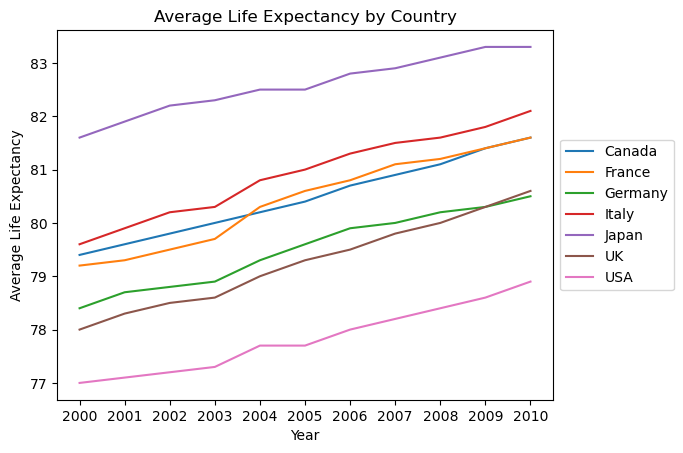

In [340]:
# Grouping by country and year to get average life expectancy for each country for each year
avg_lifeexpect = full_df.groupby(['country', 'year']).life_expectancy.mean()

# Making country as a column
avg_lifeexpect = avg_lifeexpect.unstack(level='country')

# Naming the column
avg_lifeexpect.columns.name = 'Country'

# Plotting each country's life expectancy for each year
for country in avg_lifeexpect.columns:
    plt.plot(avg_lifeexpect.index, avg_lifeexpect[country], label=country)

# Labels for the plot
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Country')

# Creating centered legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

As seen in the above line graph, overall average life expectancy has increased for each country from 2000-2010. Most of the countries' life expectancy lies between 78 and 82; However there are two outliers, Japan and United States. Japan has the highest average life expectancy out of the seven countries, with an average between 81.5 and 83. Meanwhile, the United States has the lowest average life expectancy out of the seven, with an average between 77 and about 79.

### Percent of Government Health Expenditure by Country

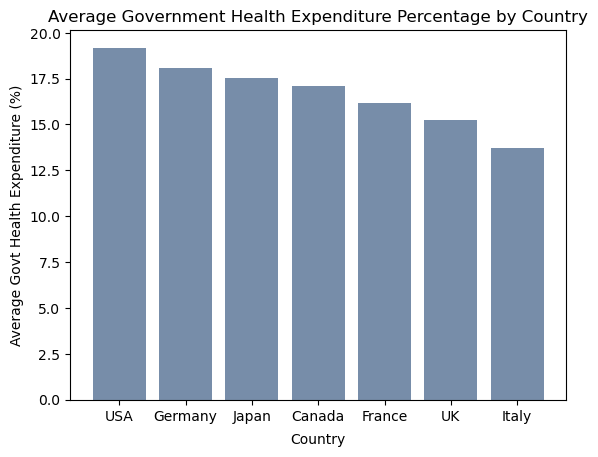

In [341]:
# Averaging % of gov health expenditure for years 2000-2010 for each country
avg_gov_percent = full_df.groupby('country').gov_expend_percent.mean().sort_values(ascending=False)

# Creating bar chart with country on x-axis and % on y-axis
plt.bar(avg_gov_percent.index, avg_gov_percent, color="#778da9")

# Labels for the plot
plt.xlabel('Country', labelpad=7)
plt.ylabel('Average Govt Health Expenditure (%)')
plt.title('Average Government Health Expenditure Percentage by Country');

The bar chart shows that the average percent of government health expenditure for years 2000-2010 for each country ranges from around 15% at the lowest to 20% at the highest. Overall, there is not a vast difference in percentage between G7 countries. Interestingly, the United States has the highest proportion of health spending however, as seen in the previous plot, the United States has the lowest average life expectancy. Japan's average percent of government health expenditure comes in around middle of the pack, however Japan did have the highest average life expectancy. Causation cannot be assessed through this analysis, but these are interesting observations to be made.

### Percent of Private Health Expenditure by Country

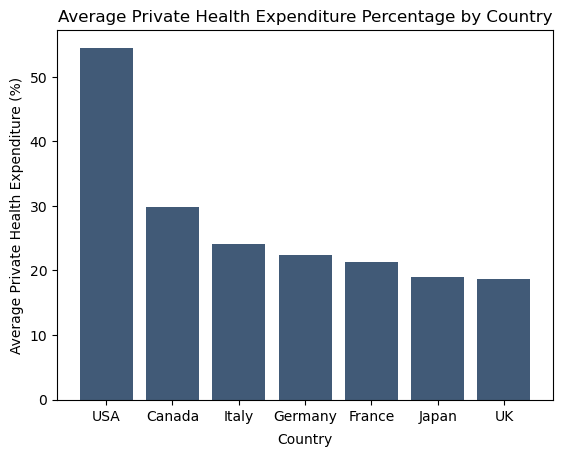

In [342]:
# Calculates average private expenditure percent by country for years 2000-2010
avg_priv_percent = full_df.groupby('country').priv_expend_percent.mean().sort_values(ascending=False)

# Creates bar chart with x values as country and y values as average private expenditure %
plt.bar(avg_priv_percent.index, avg_priv_percent, color='#415a77')

# Creates labels for chart
plt.xlabel('Country', labelpad=7)
plt.ylabel('Average Private Health Expenditure (%)')
plt.title('Average Private Health Expenditure Percentage by Country');

This bar chart shows the percentage of the total health expenditure that has been paid for by private entities such as commerical insurances or patients. It can be seen that most of the countries have similar average private health expenditure percentages for 2000-2010 except for the United States. Most countries have an average around 20%-30%, however the United States has an average private expenditure of over 50%. So far, the United States has had the highest percentage of average government health expenditure and average private health expenditure as well as the lowest average life expectancy. Japan comes second to last with the second lowest average percent.

### Government Health Spending Per Person

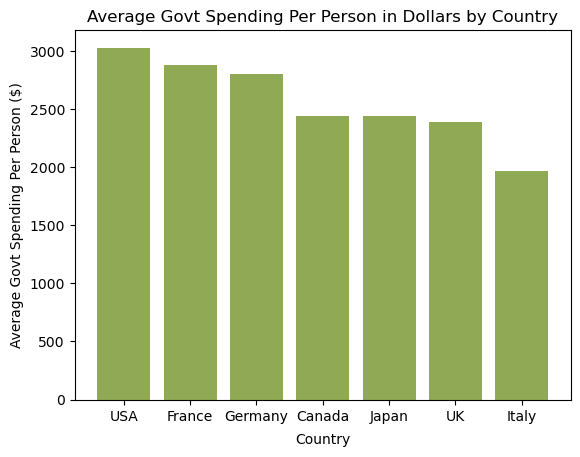

In [343]:
# Calculates average gov spending per person in dollars for each country from 2000-2010
avg_gov_dol = full_df.groupby('country').gov_dol_per_pers.mean().sort_values(ascending=False)

# Creates bar chart with x values as country and y values as avg gov spending
plt.bar(avg_gov_dol.index, avg_gov_dol, color="#90a955")

# Creates labels for chart
plt.xlabel('Country', labelpad=7)
plt.ylabel('Average Govt Spending Per Person ($)')
plt.title('Average Govt Spending Per Person in Dollars by Country');

The bar chart shows the average government spending per person in dollars for the years 2000-2010 for each country. The amounts range from around 2,000 to 3,000 dollars per person. Interestingly, there is not a huge difference in government spending, however the United States once again has the highest amount.

### Life Expectancy vs Average Percentage of Government Health Expenditure

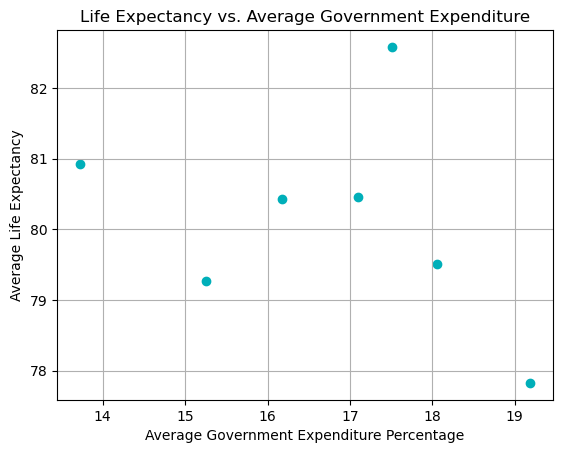

In [344]:
# Grouping by country to calculate the average government expenditure and life expectancy
avg_expenditure_life_expectancy = full_df.groupby('country')[['gov_expend_percent', 'life_expectancy']].mean()

# Extracting data for scatter plot
gov_expenditure = avg_expenditure_life_expectancy['gov_expend_percent']
life_expectancy = avg_expenditure_life_expectancy['life_expectancy']

# Creates scatter plot
plt.scatter(gov_expenditure, life_expectancy, color='#00afb9')

# Adding labels to plot
plt.xlabel('Average Government Expenditure Percentage')
plt.ylabel('Average Life Expectancy')
plt.title('Life Expectancy vs. Average Government Expenditure')
plt.grid(True);

The scatter plot above compares the average government expenditure percent plotted against the average life expectancy for each country. Each point on the graph represents a country in the dataset. There appears to be a weakly negative correlation between an increase in average percent of government health expenditure and a decrease in average life expectancy. 

<a id='conclusions'></a>
## Conclusions

After the exploratory data analysis of the life expectancy and various health economics datasets, the findings point toward the conclusion that higher health expenditures correlate with lower life expectancy. The causation of the correlation cannot be assessed in this report, however. The findings also indicate that there is variation in the life expectancies between the G7 countries, however the differences in government health spending are not very large. The difference in private health expenditure did have more variation but that was mainly due to the one outlier which was the United States. Overall, it does not appear that health economics have a huge part to play in determining life expectancy in G7 countries. Several limitations exist within this report, however the main limitation is that no statistical tests were performed, concluding that these findings are highly preliminary in nature and cannot definitevly confirm correlation or causation. 

<a id='references'></a>
## References

Canada, G. A. (2023, December 13). Government of Canada. GAC. https://www.international.gc.ca/world-monde/international_relations-     
    relations_internationales/g7/index.aspx?lang=eng 

Gapminder. (2023, December 8). Life expectancy at birth. Gapminder. https://www.gapminder.org/data/documentation/gd004/ 

World Health Organization. (2023, December). Health financing. The Global Health Observatory.   
    https://www.who.int/data/gho/data/themes/topics/health-financing 